## **Feature extraction and EDA for MEMBERS and TRANSACTIONS**

**1. Members** <br>
  1.1 Loading <br>
  1.2 Merging with train and test, and filling missing values <br>
  1.3 Univariate EDA <br>
  1.4 Multivariate EDA <br>
  
**2. Transactions** <br>
  2.1 Loading <br>
  2.2 Merging with train and test <br>
  2.3 Univariate EDA <br>
  2.4 Multivariate EDA <br>
  2.5 Featuring and EDA again <br>

**Run 1:** train.csv has the cutoff date of 2017/01/31 and sample_submission_v2.csv hase the cutoff date of 2017/03/31<br>
> ***Input files:*** 
>>train.csv <br>
>>sample_submission_v2.csv <br>
>>members_v3.csv <br>
>>transactions.csv <br>
>>transactions_v2.csv <br>

> ***Output files:***
>>*train_trans_mems.csv*<br>
>>*test_trans_mems.csv*<br>


**Run 2:** train_v2.csv has the cutoff date of 2017/02/28 <br>
> ***Input files:*** 
>>train_v2.csv <br>
>>members_v3.csv <br>
>>transactions.csv <br>
>>transactions_v2.csv <br>

> ***Output files:***
>>*train_v2_trans_mems.csv*<br>


In [1]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import gc

In [3]:
def change_datatype_numeric(df):
    int_cols = list(df.select_dtypes(include=['int64','int32','int16']).columns)
    df[int_cols] = df[int_cols].apply(pd.to_numeric,downcast='unsigned')
    
    float_cols = list(df.select_dtypes(include=['float']).columns)
    df[float_cols] = df[float_cols].apply(pd.to_numeric,downcast='float')

In [4]:
#---------------------train_v2 -----------------(Note: train.csv has different cut off date, so it will be processed separately)
#train = pd.read_csv('..\\data\\refresh\\train_v2.csv')
#train.shape

train = pd.read_csv('..\\data\\train.csv')
train.shape

(992931, 2)

In [5]:
# Change data type for train
train_size = train.memory_usage(index=True).sum()
print('original train accounts for ',train_size/ 1024**2, 'MB')

change_datatype(train)

train_size = train.memory_usage(index=True).sum()
print('changed train accounts for ',train_size/ 1024**2, 'MB')

original train accounts for  15.1510009765625 MB
changed train accounts for  8.52247142791748 MB


In [6]:
#--------test----------------------
test = pd.read_csv('..\\data\\refresh\\sample_submission_v2.csv')
test.shape

(907471, 2)

In [7]:
change_datatype(test)

# 1. Members


## 1.1 Loading Members

In [8]:
#--------member--------------------
members = pd.read_csv('..\\data\\members_v3.csv')
members.shape

(6769473, 6)

In [9]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
msno                      object
city                      int64
bd                        int64
gender                    object
registered_via            int64
registration_init_time    int64
dtypes: int64(4), object(2)
memory usage: 309.9+ MB


In [10]:
# Change data type for members
members_size = members.memory_usage(index=True).sum()
print('original members account for ',members_size / 1024**2, 'MB')

change_datatype(members)

members_size  = members.memory_usage(index=True).sum()
print('changed members account for ',members_size / 1024**2, 'MB')

original members account for  309.8819580078125 MB
changed members account for  154.9410171508789 MB


In [11]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
msno                      object
city                      int8
bd                        int16
gender                    object
registered_via            int8
registration_init_time    int32
dtypes: int16(1), int32(1), int8(2), object(2)
memory usage: 154.9+ MB


In [12]:
members.isnull().sum()

msno                            0
city                            0
bd                              0
gender                    4429505
registered_via                  0
registration_init_time          0
dtype: int64

In [13]:
members.fillna('unknown',inplace = True)

## 1.2 Merging with train and test

In [14]:
train_members = pd.merge(train,members,on='msno',how='left')
train_members.shape

(992931, 7)

In [15]:
train_members.isnull().sum()

msno                           0
is_churn                       0
city                      115770
bd                        115770
gender                    115770
registered_via            115770
registration_init_time    115770
dtype: int64

In [16]:
test_members = pd.merge(test,members,on='msno',how='left')
test_members.shape

(907471, 7)

In [17]:
test_members.isnull().sum()

msno                           0
is_churn                       0
city                      112381
bd                        112381
gender                    112381
registered_via            112381
registration_init_time    112381
dtype: int64

In [18]:
all_members = pd.concat([train_members,test_members])

In [19]:
train_members['city'].fillna(all_members['city'].mode().values[0],inplace=True)
test_members['city'].fillna(all_members['city'].mode().values[0],inplace = True)

In [20]:
train_members['bd'].fillna(all_members['bd'].median(),inplace=True)
test_members['bd'].fillna(all_members['bd'].median(),inplace = True)

In [21]:
train_members['bd'] = train_members['bd'].astype(np.int16,)
test_members['bd'] = test_members['bd'].astype(np.int16)

In [22]:
train_members['gender'].fillna('unknown',inplace=True)
test_members['gender'].fillna('unknown',inplace = True)

In [23]:
train_members['registered_via'].fillna(all_members['registered_via'].mode().values[0],inplace=True)
test_members['registered_via'].fillna(all_members['registered_via'].mode().values[0],inplace = True)

In [24]:
train_members['registration_init_time'].fillna(all_members['registration_init_time'].mode().values[0],inplace=True)
test_members['registration_init_time'].fillna(all_members['registration_init_time'].mode().values[0],inplace = True)

In [25]:
train_members.iloc[:,[2,3,4,5,6]] = train_members.iloc[:,[2,3,4,5,6]].astype(members.iloc[:,[1,2,3,4,5]].dtypes)
test_members.iloc[:,[2,3,4,5,6]] = test_members.iloc[:,[2,3,4,5,6]] .astype(members.iloc[:,[1,2,3,4,5]].dtypes)


In [26]:
del members
gc.collect()

46

In [27]:
train_members.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992931 entries, 0 to 992930
Data columns (total 7 columns):
msno                      992931 non-null object
is_churn                  992931 non-null int8
city                      992931 non-null int8
bd                        992931 non-null int16
gender                    992931 non-null object
registered_via            992931 non-null int8
registration_init_time    992931 non-null int32
dtypes: int16(1), int32(1), int8(3), object(2)
memory usage: 31.2+ MB


## 1.3 Univariate  EDA

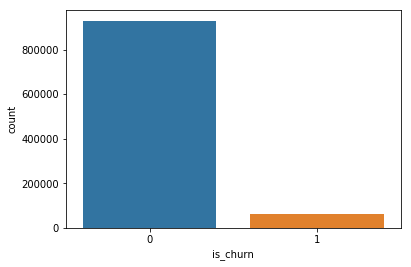

In [28]:
sns.countplot(x='is_churn',data=train_members)

Text(0.5,1,'city distribution in test set')

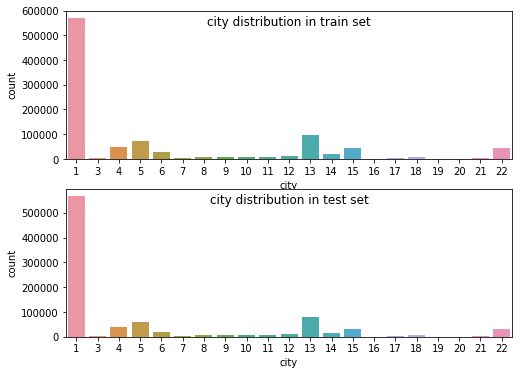

In [29]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.countplot(x='city',data=train_members, ax=ax1)
ax1.set_title('city distribution in train set',pad=-15)

sns.countplot(x='city',data=test_members, ax=ax2)
ax2.set_title('city distribution in test set',pad=-15)

Text(0.5,1,'age distribution in test set')

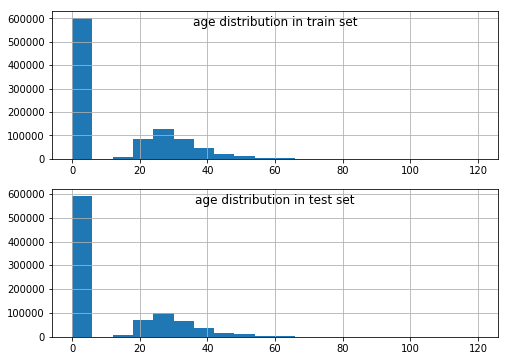

In [30]:
#---bd is age ?
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

train_members[(train_members['bd']>=0) & (train_members['bd']<=120)]['bd'].hist(bins=20,ax=ax1)
ax1.set_title('age distribution in train set',pad=-15)

test_members[(test_members['bd']>=0) & (test_members['bd']<=120)]['bd'].hist(bins=20,ax=ax2)
ax2.set_title('age distribution in test set',pad=-15)

Text(1,1,'test set')

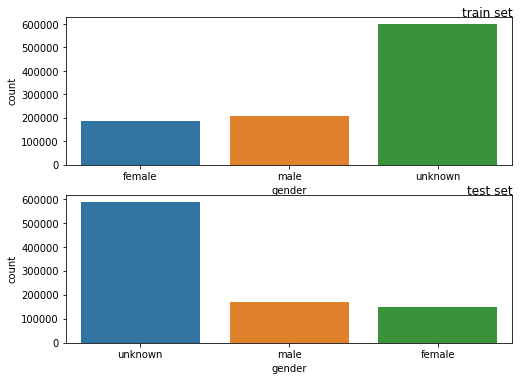

In [31]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.countplot(x='gender',data=train_members, ax=ax1)
ax1.set_title('train set',pad=0,loc='right')

sns.countplot(x='gender',data=test_members, ax=ax2)
ax2.set_title('test set',pad=0,loc='right')

Text(1,1,'test set')

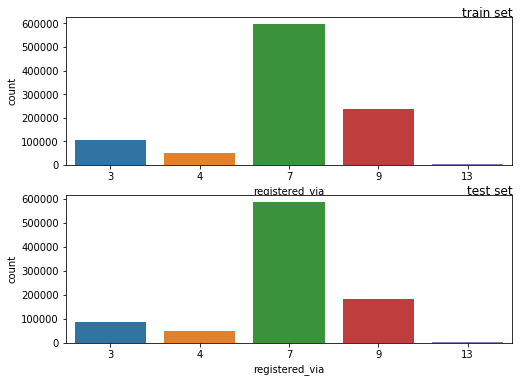

In [32]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.countplot(x='registered_via',data=train_members, ax=ax1)
ax1.set_title('train set',pad=0,loc='right')

sns.countplot(x='registered_via',data=test_members, ax=ax2)
ax2.set_title('test set',pad=0,loc='right')

Text(0.5,1,'test set')

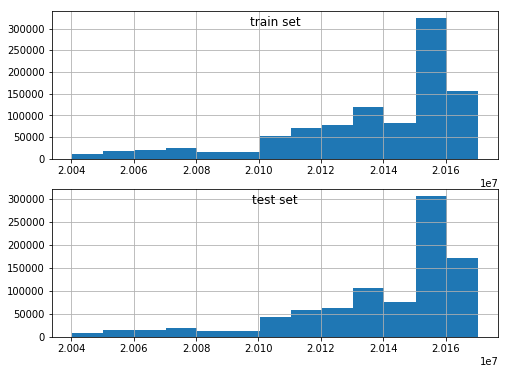

In [33]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

train_members['registration_init_time'].hist(bins=13,ax=ax1)
ax1.set_title('train set',pad=-15)
test_members['registration_init_time'].hist(bins=13,ax=ax2)
ax2.set_title('test set',pad=-15)


## 1.4 Multivariate EDA

Text(0.5,1,'percentage of users churning in cities')

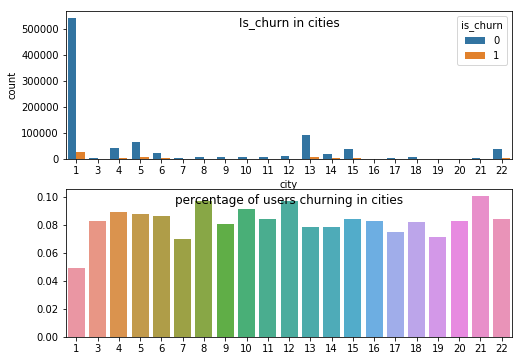

In [34]:
# 'is_churn' VS 'city'
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.countplot(x='city',data=train_members,hue='is_churn',ax=ax1)
ax1.set_title('Is_churn in cities',pad=-15)
sns.barplot(np.delete(np.arange(1,23,1),1),np.array(train_members.groupby(by='city')['is_churn'].mean()),ax=ax2)
ax2.set_title('percentage of users churning in cities',pad=-15)


Text(0.5,1,'percentage of users churning using register_via')

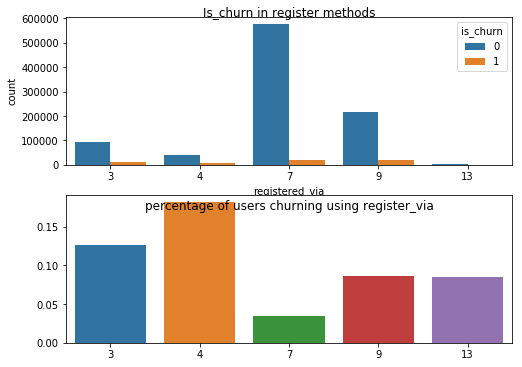

In [35]:
# 'is_churn' VS 'registered_via'
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.countplot(x='registered_via',data=train_members,hue='is_churn',ax=ax1)
ax1.set_title('Is_churn in register methods',pad=0)

sns.barplot([3,4,7,9,13],np.array(train_members.groupby(by='registered_via')['is_churn'].mean()),ax=ax2)
ax2.set_title('percentage of users churning using register_via',pad=-15)


In [36]:
#  'is_churn' VS 'year'
train_members['registration_init_date']=pd.to_datetime(train_members['registration_init_time'],format='%Y%m%d')
test_members['registration_init_date']=pd.to_datetime(test_members['registration_init_time'],format='%Y%m%d')

In [37]:
train_members['year'] = pd.DatetimeIndex(train_members['registration_init_date']).year
test_members['year'] = pd.DatetimeIndex(test_members['registration_init_date']).year

In [38]:
train_members['month'] = pd.DatetimeIndex(train_members['registration_init_date']).month
test_members['month'] = pd.DatetimeIndex(test_members['registration_init_date']).month

Text(0.5,1,'percentage of users churning in years')

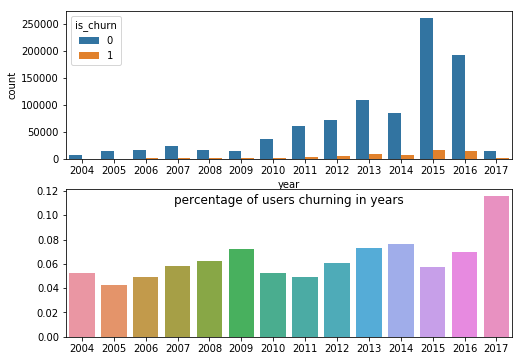

In [39]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.countplot(x='year',data=train_members,hue='is_churn',ax=ax1)
sns.barplot(np.arange(2004,2018,1),np.array(train_members.groupby(by='year')['is_churn'].mean()),ax=ax2)
ax2.set_title('percentage of users churning in years',pad=-15)

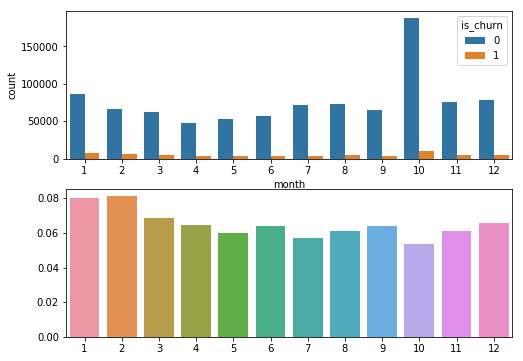

In [40]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.countplot(x='month',data=train_members,hue='is_churn',ax=ax1)
sns.barplot(np.arange(1,13,1),np.array(train_members.groupby(by='month')['is_churn'].mean()),ax=ax2)

In [41]:
data_train = train_members
data_test = test_members

In [42]:
#data_train = train_members.drop(labels=['registration_init_time','registration_init_date'],axis=1)
#data_test = test_members.drop(labels=['registration_init_time','registration_init_date'],axis=1)

In [43]:
del train_members, test_members, all_members
gc.collect()

15

In [44]:
data_train.head(3)

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_date,year,month
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18,36,female,9,20050406,2005-04-06,2005,4
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10,38,male,9,20050407,2005-04-07,2005,4
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11,27,female,9,20051016,2005-10-16,2005,10


# 2. Transactions

## 2.1 Loading Transactions

In [45]:
#----------transaction---------------------
transactions_v2 = pd.read_csv('..\\data\\refresh\\transactions_v2.csv')
transactions_v2.shape

(1431009, 9)

In [46]:
transactions = pd.read_csv('..\\data\\transactions.csv')
transactions.shape

(21547746, 9)

In [47]:
transactions = pd.concat([transactions_v2,transactions])

In [48]:
del transactions_v2
gc.collect()

7

In [49]:
# Change data type for transactions
tran = transactions.memory_usage(index=True).sum()
print('Original transactions account for ',tran/ 1024**2, 'MB')

change_datatype(transactions)

tran = transactions.memory_usage(index=True).sum()
print('Changed transactions account for ',tran/ 1024**2, 'MB')

Original transactions account for  1753.139877319336 MB
Changed transactions account for  723.1701993942261 MB


In [50]:
transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,20170131,20170504,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150809,20190412,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,20170303,20170422,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,20170329,20170331,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,20170323,20170423,0


## 2.2 Merging with train and test set

In [51]:
train_transactions = pd.merge(train,transactions.sort_values(by=['msno','transaction_date']),on='msno',how='left')
train_transactions.shape

(17017504, 10)

In [52]:
test_transactions = pd.merge(test,transactions.sort_values(by=['msno','transaction_date']),on='msno',how='left')
test_transactions.shape

(14545180, 10)

In [53]:
train_transactions.isnull().sum()

msno                      0
is_churn                  0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
dtype: int64

In [54]:
test_transactions.isnull().sum()

msno                      0
is_churn                  0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
dtype: int64

In [55]:
del transactions
gc.collect()

7

In [56]:
train_transactions.head(10)

,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,38,7,0,0,0,20161031,20161107,0
1,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,38,30,149,149,0,20170107,20170206,0
2,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,31,149,149,1,20150131,20150321,0
3,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,31,149,149,1,20150228,20150421,0
4,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,31,149,149,1,20150331,20150521,0
5,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,0,0,149,1,20150430,20150621,0
6,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,20150531,20150721,0
7,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,20150630,20150821,0
8,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,20150731,20150921,0
9,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,20150831,20151021,0


## 2.3 Univaritate EDA

In [57]:
train_transactions.describe()

,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,1.701750e+07,1.701750e+07,1.701750e+07,1.701750e+07,1.701750e+07,1.701750e+07,1.701750e+07,1.701750e+07,1.701750e+07
mean,4.268393e-02,3.920199e+01,2.998478e+01,1.325592e+02,1.367956e+02,9.246743e-01,2.015926e+07,2.016041e+07,1.803702e-02
std,2.021436e-01,3.341173e+00,1.782643e+01,7.951860e+01,7.652553e+01,2.639162e-01,6.631928e+03,7.153574e+03,1.330852e-01
min,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015010e+07,1.970010e+07,0.000000e+00
25%,0.000000e+00,3.900000e+01,3.000000e+01,9.900000e+01,9.900000e+01,1.000000e+00,2.015111e+07,2.015122e+07,0.000000e+00
50%,0.000000e+00,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.016061e+07,2.016072e+07,0.000000e+00
75%,0.000000e+00,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.016112e+07,2.016122e+07,0.000000e+00
max,1.000000e+00,4.100000e+01,4.500000e+02,2.000000e+03,2.000000e+03,1.000000e+00,2.017033e+07,2.025100e+07,1.000000e+00


In [58]:
test_transactions.describe()

,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,14545180.0,1.454518e+07,1.454518e+07,1.454518e+07,1.454518e+07,1.454518e+07,1.454518e+07,1.454518e+07,1.454518e+07
mean,0.0,3.930906e+01,2.994988e+01,1.308508e+02,1.348720e+02,9.221872e-01,2.015949e+07,2.016052e+07,1.607914e-02
std,0.0,3.267998e+00,1.722883e+01,7.795620e+01,7.515690e+01,2.678768e-01,6.585572e+03,7.175315e+03,1.257800e-01
min,0.0,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015010e+07,1.970010e+07,0.000000e+00
25%,0.0,3.900000e+01,3.000000e+01,9.900000e+01,9.900000e+01,1.000000e+00,2.015113e+07,2.016010e+07,0.000000e+00
50%,0.0,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.016061e+07,2.016072e+07,0.000000e+00
75%,0.0,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.016112e+07,2.016122e+07,0.000000e+00
max,0.0,4.100000e+01,4.500000e+02,2.000000e+03,2.000000e+03,1.000000e+00,2.017033e+07,2.023082e+07,1.000000e+00


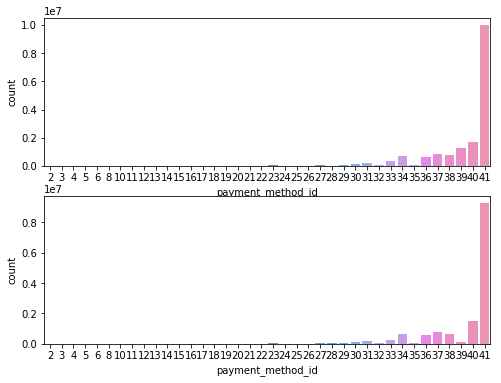

In [59]:
# Payment_method_id
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.countplot(x='payment_method_id',data=train_transactions, ax=ax1)
sns.countplot(x='payment_method_id',data=test_transactions, ax=ax2)

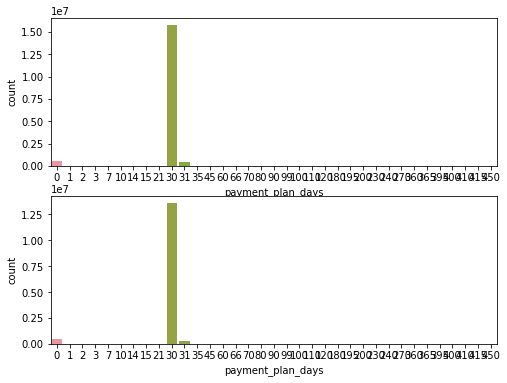

In [60]:
# Payment_plan_days
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.countplot(x='payment_plan_days',data=train_transactions, ax=ax1)
sns.countplot(x='payment_plan_days',data=test_transactions, ax=ax2)

C:\Users\kartik\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kartik\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


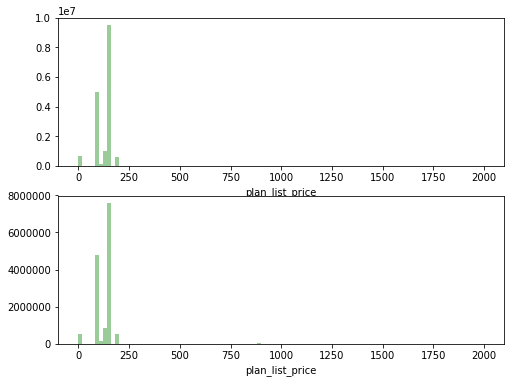

In [61]:
# plan_list_price
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.distplot(train_transactions['plan_list_price'], ax=ax1,kde=False,bins=100,color='g')
sns.distplot(test_transactions['plan_list_price'], ax=ax2,kde=False,bins =100,color='g')

C:\Users\kartik\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kartik\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


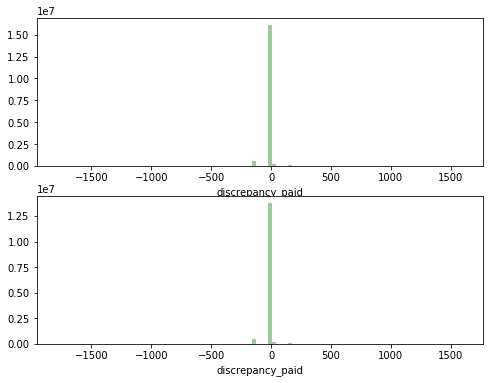

In [62]:
# discrepancy_paid
train_transactions['discrepancy_paid']=train_transactions['plan_list_price']-train_transactions['actual_amount_paid']
test_transactions['discrepancy_paid']=test_transactions['plan_list_price']-test_transactions['actual_amount_paid']

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.distplot(train_transactions['discrepancy_paid'], ax=ax1,kde=False,bins = 100,color='g')
sns.distplot(test_transactions['discrepancy_paid'], ax=ax2,kde=False, bins =100,color='g')

In [63]:
print('number of user paid less: ',train_transactions[train_transactions['discrepancy_paid']>0].shape[0])
print('number of user paid more: ',train_transactions[train_transactions['discrepancy_paid']<0].shape[0])

number of user paid less:  300046
number of user paid more:  597666


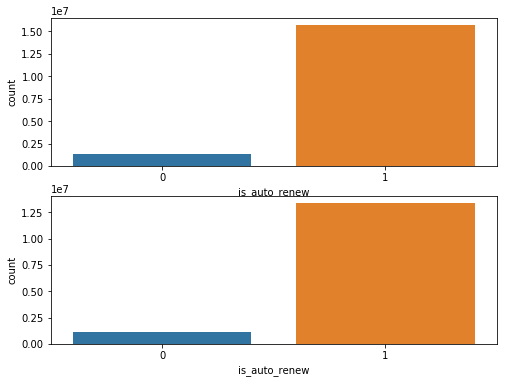

In [64]:
# is_auto_renew
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.countplot(x='is_auto_renew',data=train_transactions, ax=ax1)
sns.countplot(x='is_auto_renew',data=test_transactions, ax=ax2)


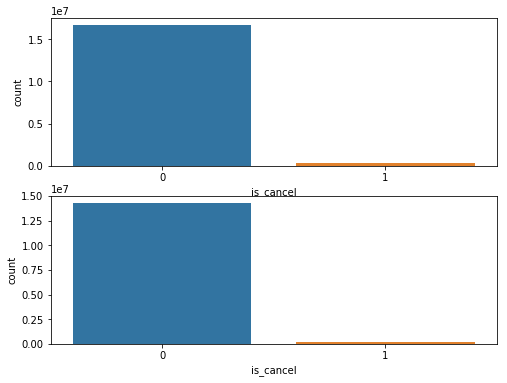

In [65]:
# is_cancel
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.countplot(x='is_cancel',data=train_transactions, ax=ax1)
sns.countplot(x='is_cancel',data=test_transactions, ax=ax2)

## 2.4 Multivariate EDA

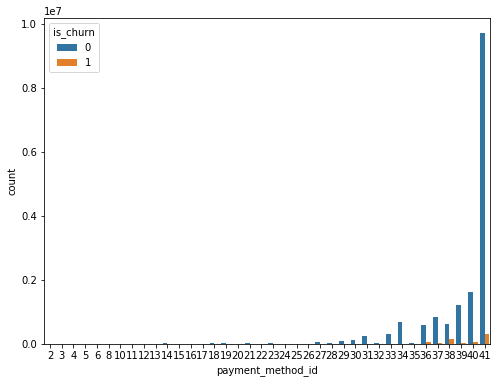

In [66]:
# payment methods VS is_churn

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
sns.countplot(x='payment_method_id',data=train_transactions,hue='is_churn',ax=ax1)

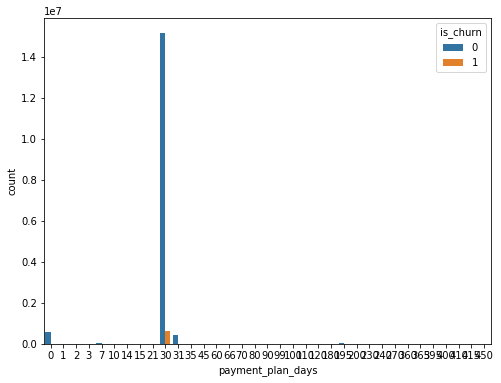

In [67]:
# payment plan days VS is_churn

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
sns.countplot(x='payment_plan_days',data=train_transactions,hue='is_churn',ax=ax1)

Text(0.5,1,'percentage of users churning with and without auto_renew')

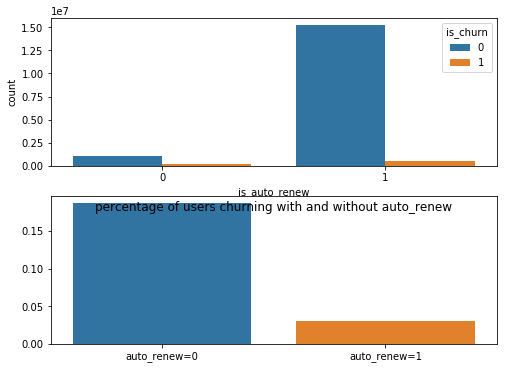

In [68]:
# is_auto_renew VS is_churn
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.countplot(x='is_auto_renew',data=train_transactions,hue='is_churn',ax=ax1)
sns.barplot(['auto_renew=0','auto_renew=1'],np.array(train_transactions.groupby(by='is_auto_renew')['is_churn'].mean()),ax=ax2)
ax2.set_title('percentage of users churning with and without auto_renew',pad=-15)

Text(0.5,1,'percentage of users churning with and without cancel')

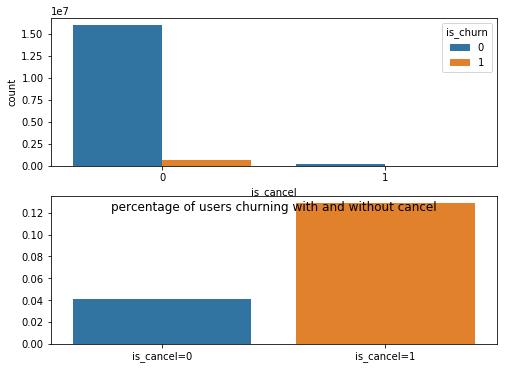

In [69]:
# cancel VS is_churn
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.countplot(x='is_cancel',data=train_transactions,hue='is_churn',ax=ax1)

sns.barplot(['is_cancel=0','is_cancel=1'],np.array(train_transactions.groupby(by='is_cancel')['is_churn'].mean()),ax=ax2)
ax2.set_title('percentage of users churning with and without cancel',pad=-15)

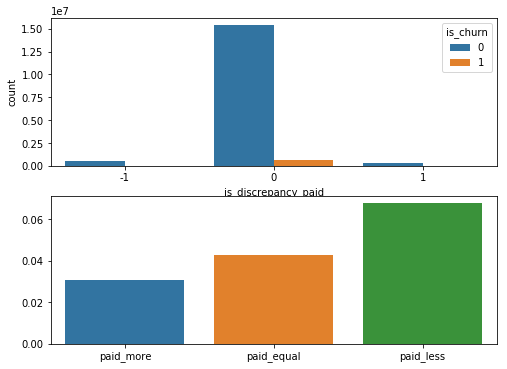

In [70]:
# discrepancy_paid VS is_churn
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

train_transactions['is_discrepancy_paid']= train_transactions['discrepancy_paid'].apply(lambda x: 0 if x==0 else (1 if x>0 else -1))
test_transactions['is_discrepancy_paid']= test_transactions['discrepancy_paid'].apply(lambda x: 0 if x==0 else (1 if x>0 else -1))

sns.countplot(x='is_discrepancy_paid',data=train_transactions,hue='is_churn',ax=ax1)

sns.barplot(['paid_more','paid_equal','paid_less'],np.array(train_transactions.groupby(by='is_discrepancy_paid')['is_churn'].mean()),ax=ax2)
#ax2.set_title('percentage of users churning in cases of paid_more, paid_equal, and paid_less',pad=-15)

In [71]:
train_transactions.head()

,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discrepancy_paid,is_discrepancy_paid
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,38,7,0,0,0,20161031,20161107,0,0,0
1,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,38,30,149,149,0,20170107,20170206,0,0,0
2,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,31,149,149,1,20150131,20150321,0,0,0
3,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,31,149,149,1,20150228,20150421,0,0,0
4,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,31,149,149,1,20150331,20150521,0,0,0


## 2.5 Featuring and EDA again


In [72]:
cutoff_date_train = ((20170131//10**4)*365 + (20170131%10**4)//10**2*30 + (20170131%10**4)%10**2)
#cutoff_date_train = ((20170228//10**4)*365 + (20170228%10**4)//10**2*30 + (20170228%10**4)%10**2)  #
cutoff_date_test = ((20170331//10**4)*365 + (20170331%10**4)//10**2*30 + (20170331%10**4)%10**2)

In [73]:
# Convert date
train_transactions['date_relative']= train_transactions['transaction_date'].apply(lambda x: cutoff_date_train - ((x//10**4)*365 + (x%10**4)//10**2*30 + (x%10**4)%10**2))
test_transactions['date_relative']= test_transactions['transaction_date'].apply(lambda x: cutoff_date_test - ((x//10**4)*365 + (x%10**4)//10**2*30 + (x%10**4)%10**2))

In [74]:
data_train.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_date,year,month
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18,36,female,9,20050406,2005-04-06,2005,4
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10,38,male,9,20050407,2005-04-07,2005,4
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11,27,female,9,20051016,2005-10-16,2005,10
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13,23,female,9,20051102,2005-11-02,2005,11
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3,27,male,9,20051228,2005-12-28,2005,12


In [75]:
# 1. Number of transactions of each user
number = train_transactions['msno'].value_counts()
number_train = pd.DataFrame({'msno':number.index, 'total_transactions':number.values})

number = test_transactions['msno'].value_counts()
number_test = pd.DataFrame({'msno':number.index, 'total_transactions':number.values})

In [76]:
data_train = pd.merge(data_train,number_train,on='msno',how='left')
data_train.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_date,year,month,total_transactions
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18,36,female,9,20050406,2005-04-06,2005,4,2
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10,38,male,9,20050407,2005-04-07,2005,4,23
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11,27,female,9,20051016,2005-10-16,2005,10,10
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13,23,female,9,20051102,2005-11-02,2005,11,3
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3,27,male,9,20051228,2005-12-28,2005,12,9


In [77]:
data_test = pd.merge(data_test,number_test,on='msno',how='left')
data_test.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_date,year,month,total_transactions
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0,1,0,unknown,7,20150718,2015-07-18,2015,7,21
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,4,28,male,9,20051030,2005-10-30,2005,10,23
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0,4,34,male,7,20141101,2014-11-01,2014,11,11
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0,1,0,unknown,7,20151009,2015-10-09,2015,10,17
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0,1,0,unknown,13,20161222,2016-12-22,2016,12,4


In [78]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907471 entries, 0 to 907470
Data columns (total 11 columns):
msno                      907471 non-null object
is_churn                  907471 non-null int8
city                      907471 non-null int8
bd                        907471 non-null int16
gender                    907471 non-null object
registered_via            907471 non-null int8
registration_init_time    907471 non-null int32
registration_init_date    907471 non-null datetime64[ns]
year                      907471 non-null int64
month                     907471 non-null int64
total_transactions        907471 non-null int64
dtypes: datetime64[ns](1), int16(1), int32(1), int64(3), int8(3), object(2)
memory usage: 56.3+ MB


In [79]:
del number_train, number_test, number
gc.collect()

113

In [80]:
# 2.  Number of transactions of each user within 12m 
number = train_transactions[(train_transactions['date_relative']>=0) & (train_transactions['date_relative']<366)].groupby(by='msno')['date_relative'].apply(lambda x: x.shape[0])
number_train = pd.DataFrame({'msno':number.index, 'total_transactions_12m':number.values})

number = test_transactions[(test_transactions['date_relative']>=0) & (test_transactions['date_relative']<366)].groupby(by='msno')['date_relative'].apply(lambda x: x.shape[0])
number_test = pd.DataFrame({'msno':number.index, 'total_transactions_12m':number.values})

data_train = pd.merge(data_train,number_train,on='msno',how='left')
data_test = pd.merge(data_test,number_test,on='msno',how='left')


In [81]:
data_train['total_transactions_12m'].fillna(0, inplace = True)
data_test['total_transactions_12m'].fillna(0, inplace = True)

#data_train['total_transactions_12m']= data_train['total_transactions_12m'].astype(dtype= 'uint16')
#data_test['total_transactions_12m']= data_test['total_transactions_12m'].astype(dtype= 'uint16')

In [82]:
#  3.  Number of transactions of each user within 6m 
number = train_transactions[(train_transactions['date_relative']>=0) & (train_transactions['date_relative']<183)].groupby(by='msno')['date_relative'].apply(lambda x: x.shape[0])
number_train = pd.DataFrame({'msno':number.index, 'total_transactions_6m':number.values})

number = test_transactions[(test_transactions['date_relative']>=0) & (test_transactions['date_relative']<183)].groupby(by='msno')['date_relative'].apply(lambda x: x.shape[0])
number_test = pd.DataFrame({'msno':number.index, 'total_transactions_6m':number.values})

data_train = pd.merge(data_train,number_train,on='msno',how='left')
data_test = pd.merge(data_test,number_test,on='msno',how='left')

In [83]:
data_train['total_transactions_6m'].fillna(0, inplace = True)
data_test['total_transactions_6m'].fillna(0, inplace = True)

#data_train['total_transactions_6m']= data_train['total_transactions_6m'].astype(dtype= 'uint16')
#data_test['total_transactions_6m']= data_test['total_transactions_6m'].astype(dtype= 'uint16')

In [84]:
#  4.  Number of transactions of each user within 3m 
number = train_transactions[(train_transactions['date_relative']>=0) & (train_transactions['date_relative']<92)].groupby(by='msno')['date_relative'].apply(lambda x: x.shape[0])
number_train = pd.DataFrame({'msno':number.index, 'total_transactions_3m':number.values})

number = test_transactions[(test_transactions['date_relative']>=0) & (test_transactions['date_relative']<92)].groupby(by='msno')['date_relative'].apply(lambda x: x.shape[0])
number_test = pd.DataFrame({'msno':number.index, 'total_transactions_3m':number.values})

data_train = pd.merge(data_train,number_train,on='msno',how='left')
data_test = pd.merge(data_test,number_test,on='msno',how='left')

In [85]:
data_train['total_transactions_3m'].fillna(0, inplace = True)
data_test['total_transactions_3m'].fillna(0, inplace = True)

#data_train['total_transactions_3m']= data_train['total_transactions_3m'].astype(dtype= 'uint16')
#data_test['total_transactions_3m']= data_test['total_transactions_3m'].astype(dtype= 'uint16')

In [86]:
#5. Latest transactions
number = train_transactions[train_transactions['date_relative']>=0].groupby(by='msno')['date_relative'].apply(lambda x: x.min())
latest_train = pd.DataFrame({'msno':number.index, 'latest_transactions':number.values})

number = test_transactions[test_transactions['date_relative']>=0].groupby(by='msno')['date_relative'].apply(lambda x: x.min())
latest_test = pd.DataFrame({'msno':number.index, 'latest_transactions':number.values})

data_train = pd.merge(data_train,latest_train,on='msno',how='left')
data_test = pd.merge(data_test,latest_test,on='msno',how='left')

In [88]:
# 6. Common payment_method_id for each user

common = train_transactions[train_transactions['date_relative']>=0].groupby(by='msno')['payment_method_id'].apply(lambda x: x.mode()[0])
common_train = pd.DataFrame({'msno':common.index, 'common_payment_method':common.values})

common = test_transactions[test_transactions['date_relative']>=0].groupby(by='msno')['payment_method_id'].apply(lambda x: x.mode()[0])
common_test = pd.DataFrame({'msno':common.index, 'common_payment_method':common.values})


In [89]:
data_train = pd.merge(data_train,common_train,on='msno',how='left')
data_train.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_date,year,month,total_transactions,total_transactions_12m,total_transactions_6m,total_transactions_3m,latest_transactions,common_payment_method
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18,36,female,9,20050406,2005-04-06,2005,4,2,2.0,2.0,1.0,24.0,38.0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10,38,male,9,20050407,2005-04-07,2005,4,23,11.0,6.0,3.0,0.0,39.0
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11,27,female,9,20051016,2005-10-16,2005,10,10,10.0,6.0,3.0,19.0,39.0
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13,23,female,9,20051102,2005-11-02,2005,11,3,0.0,0.0,0.0,390.0,17.0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3,27,male,9,20051228,2005-12-28,2005,12,9,7.0,3.0,3.0,3.0,38.0


In [90]:
data_test = pd.merge(data_test,common_test,on='msno',how='left')
data_test.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_date,year,month,total_transactions,total_transactions_12m,total_transactions_6m,total_transactions_3m,latest_transactions,common_payment_method
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0,1,0,unknown,7,20150718,2015-07-18,2015,7,21,12.0,6.0,3.0,13,41
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,4,28,male,9,20051030,2005-10-30,2005,10,23,13.0,6.0,3.0,0,34
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0,4,34,male,7,20141101,2014-11-01,2014,11,11,5.0,5.0,3.0,16,41
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0,1,0,unknown,7,20151009,2015-10-09,2015,10,17,12.0,6.0,3.0,4,41
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0,1,0,unknown,13,20161222,2016-12-22,2016,12,4,4.0,4.0,3.0,9,30


In [91]:
data_train.isnull().sum()

msno                         0
is_churn                     0
city                         0
bd                           0
gender                       0
registered_via               0
registration_init_time       0
registration_init_date       0
year                         0
month                        0
total_transactions           0
total_transactions_12m       0
total_transactions_6m        0
total_transactions_3m        0
latest_transactions       1462
common_payment_method     1462
dtype: int64

In [92]:
data_test.isnull().sum()

msno                      0
is_churn                  0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
registration_init_date    0
year                      0
month                     0
total_transactions        0
total_transactions_12m    0
total_transactions_6m     0
total_transactions_3m     0
latest_transactions       0
common_payment_method     0
dtype: int64

In [93]:
del common, common_train, common_test
gc.collect()

35

In [94]:
# 7. number of payment methods of each users

number = train_transactions[train_transactions['date_relative']>=0].groupby(by='msno')['payment_method_id'].nunique()
number_train = pd.DataFrame({'msno':number.index, 'number_payment_method':number.values})

number = test_transactions[test_transactions['date_relative']>=0].groupby(by='msno')['payment_method_id'].nunique()
number_test = pd.DataFrame({'msno':number.index, 'number_payment_method':number.values})

In [95]:
data_train = pd.merge(data_train,number_train,on='msno',how='left')
data_train.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_date,year,month,total_transactions,total_transactions_12m,total_transactions_6m,total_transactions_3m,latest_transactions,common_payment_method,number_payment_method
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18,36,female,9,20050406,2005-04-06,2005,4,2,2.0,2.0,1.0,24.0,38.0,1.0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10,38,male,9,20050407,2005-04-07,2005,4,23,11.0,6.0,3.0,0.0,39.0,2.0
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11,27,female,9,20051016,2005-10-16,2005,10,10,10.0,6.0,3.0,19.0,39.0,2.0
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13,23,female,9,20051102,2005-11-02,2005,11,3,0.0,0.0,0.0,390.0,17.0,2.0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3,27,male,9,20051228,2005-12-28,2005,12,9,7.0,3.0,3.0,3.0,38.0,1.0


In [96]:
data_test = pd.merge(data_test,number_test,on='msno',how='left')
data_test.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_date,year,month,total_transactions,total_transactions_12m,total_transactions_6m,total_transactions_3m,latest_transactions,common_payment_method,number_payment_method
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0,1,0,unknown,7,20150718,2015-07-18,2015,7,21,12.0,6.0,3.0,13,41,1
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,4,28,male,9,20051030,2005-10-30,2005,10,23,13.0,6.0,3.0,0,34,1
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0,4,34,male,7,20141101,2014-11-01,2014,11,11,5.0,5.0,3.0,16,41,1
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0,1,0,unknown,7,20151009,2015-10-09,2015,10,17,12.0,6.0,3.0,4,41,1
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0,1,0,unknown,13,20161222,2016-12-22,2016,12,4,4.0,4.0,3.0,9,30,1


In [97]:
del number, number_train, number_test
gc.collect()

56

Text(0.5,1,'percentage of users churning wrt number of payment method')

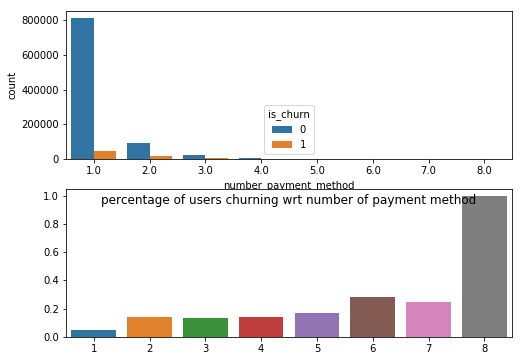

In [100]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.countplot(x='number_payment_method',data=data_train,hue='is_churn',ax=ax1)
sns.barplot(list(np.arange(1,9,1)),np.array(data_train.groupby(by='number_payment_method')['is_churn'].mean()),ax=ax2)
ax2.set_title('percentage of users churning wrt number of payment method',pad=-15)

In [101]:
# 8 common payment plan days

common = train_transactions[train_transactions['date_relative']>=0].groupby(by='msno')['payment_plan_days'].apply(lambda x: x.mode()[0])
common_train = pd.DataFrame({'msno':common.index, 'common_plan_days':common.values})

common = test_transactions[test_transactions['date_relative']>=0].groupby(by='msno')['payment_plan_days'].apply(lambda x: x.mode()[0])
common_test = pd.DataFrame({'msno':common.index, 'common_plan_days':common.values})

In [102]:
data_train = pd.merge(data_train,common_train,on='msno',how='left')
data_train.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_date,year,month,total_transactions,total_transactions_12m,total_transactions_6m,total_transactions_3m,latest_transactions,common_payment_method,number_payment_method,common_plan_days
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18,36,female,9,20050406,2005-04-06,2005,4,2,2.0,2.0,1.0,24.0,38.0,1.0,7.0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10,38,male,9,20050407,2005-04-07,2005,4,23,11.0,6.0,3.0,0.0,39.0,2.0,30.0
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11,27,female,9,20051016,2005-10-16,2005,10,10,10.0,6.0,3.0,19.0,39.0,2.0,30.0
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13,23,female,9,20051102,2005-11-02,2005,11,3,0.0,0.0,0.0,390.0,17.0,2.0,410.0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3,27,male,9,20051228,2005-12-28,2005,12,9,7.0,3.0,3.0,3.0,38.0,1.0,30.0


In [103]:
data_test = pd.merge(data_test,common_test,on='msno',how='left')
data_test.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_date,year,month,total_transactions,total_transactions_12m,total_transactions_6m,total_transactions_3m,latest_transactions,common_payment_method,number_payment_method,common_plan_days
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0,1,0,unknown,7,20150718,2015-07-18,2015,7,21,12.0,6.0,3.0,13,41,1,30
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,4,28,male,9,20051030,2005-10-30,2005,10,23,13.0,6.0,3.0,0,34,1,30
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0,4,34,male,7,20141101,2014-11-01,2014,11,11,5.0,5.0,3.0,16,41,1,30
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0,1,0,unknown,7,20151009,2015-10-09,2015,10,17,12.0,6.0,3.0,4,41,1,30
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0,1,0,unknown,13,20161222,2016-12-22,2016,12,4,4.0,4.0,3.0,9,30,1,30


In [104]:
data_train.isnull().sum()

msno                         0
is_churn                     0
city                         0
bd                           0
gender                       0
registered_via               0
registration_init_time       0
registration_init_date       0
year                         0
month                        0
total_transactions           0
total_transactions_12m       0
total_transactions_6m        0
total_transactions_3m        0
latest_transactions       1462
common_payment_method     1462
number_payment_method     1462
common_plan_days          1462
dtype: int64

In [105]:
data_test.isnull().sum()

msno                      0
is_churn                  0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
registration_init_date    0
year                      0
month                     0
total_transactions        0
total_transactions_12m    0
total_transactions_6m     0
total_transactions_3m     0
latest_transactions       0
common_payment_method     0
number_payment_method     0
common_plan_days          0
dtype: int64

In [106]:
del common, common_train, common_test
gc.collect()

706

In [107]:
# 9. latest_ is_ renew_ auto
latest = train_transactions[train_transactions['date_relative']>=0].groupby(by='msno')['is_auto_renew'].apply(lambda x: x.iloc[-1])
latest_renew_train = pd.DataFrame({'msno':latest.index, 'latest_auto_renew':latest.values})

latest = test_transactions[test_transactions['date_relative']>=0].groupby(by='msno')['is_auto_renew'].apply(lambda x: x.iloc[-1])
latest_renew_test = pd.DataFrame({'msno':latest.index, 'latest_auto_renew':latest.values})


In [108]:
data_train = pd.merge(data_train,latest_renew_train,on='msno',how='left')
data_train.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_date,year,month,total_transactions,total_transactions_12m,total_transactions_6m,total_transactions_3m,latest_transactions,common_payment_method,number_payment_method,common_plan_days,latest_auto_renew
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18,36,female,9,20050406,2005-04-06,2005,4,2,2.0,2.0,1.0,24.0,38.0,1.0,7.0,0.0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10,38,male,9,20050407,2005-04-07,2005,4,23,11.0,6.0,3.0,0.0,39.0,2.0,30.0,1.0
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11,27,female,9,20051016,2005-10-16,2005,10,10,10.0,6.0,3.0,19.0,39.0,2.0,30.0,1.0
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13,23,female,9,20051102,2005-11-02,2005,11,3,0.0,0.0,0.0,390.0,17.0,2.0,410.0,0.0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3,27,male,9,20051228,2005-12-28,2005,12,9,7.0,3.0,3.0,3.0,38.0,1.0,30.0,0.0


In [109]:
data_test = pd.merge(data_test,latest_renew_test,on='msno',how='left')
data_test.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_date,year,month,total_transactions,total_transactions_12m,total_transactions_6m,total_transactions_3m,latest_transactions,common_payment_method,number_payment_method,common_plan_days,latest_auto_renew
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0,1,0,unknown,7,20150718,2015-07-18,2015,7,21,12.0,6.0,3.0,13,41,1,30,1
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,4,28,male,9,20051030,2005-10-30,2005,10,23,13.0,6.0,3.0,0,34,1,30,1
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0,4,34,male,7,20141101,2014-11-01,2014,11,11,5.0,5.0,3.0,16,41,1,30,1
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0,1,0,unknown,7,20151009,2015-10-09,2015,10,17,12.0,6.0,3.0,4,41,1,30,1
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0,1,0,unknown,13,20161222,2016-12-22,2016,12,4,4.0,4.0,3.0,9,30,1,30,1


Text(0.5,1,'percentage of users churning wrt latest_auto_renew')

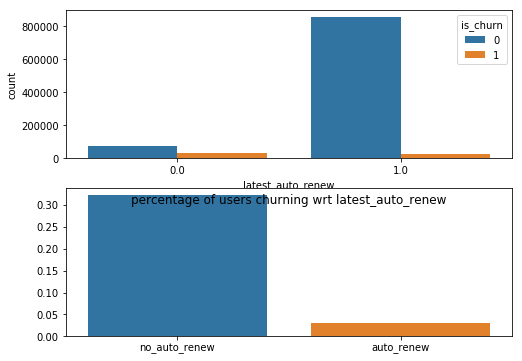

In [110]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.countplot(x='latest_auto_renew',data=data_train,hue='is_churn',ax=ax1)
sns.barplot(['no_auto_renew','auto_renew'],np.array(data_train.groupby(by='latest_auto_renew')['is_churn'].mean()),ax=ax2)
ax2.set_title('percentage of users churning wrt latest_auto_renew',pad=-15)

In [111]:
del latest, latest_renew_train, latest_renew_test
gc.collect()

14

In [112]:
# 10. Rate of auto renew
latest = train_transactions[train_transactions['date_relative']>=0].groupby(by='msno')['is_auto_renew'].apply(lambda x: x.mean())
latest_renew_train = pd.DataFrame({'msno':latest.index, 'rate_auto_renew':latest.values})

latest = test_transactions[test_transactions['date_relative']>=0].groupby(by='msno')['is_auto_renew'].apply(lambda x: x.mean())
latest_renew_test = pd.DataFrame({'msno':latest.index, 'rate_auto_renew':latest.values})

data_train = pd.merge(data_train,latest_renew_train,on='msno',how='left')
data_test = pd.merge(data_test,latest_renew_test,on='msno',how='left')

In [113]:
# 11. latest _is_cancel
latest = train_transactions[train_transactions['date_relative']>=0].groupby(by='msno')['is_cancel'].apply(lambda x: x.iloc[-1])
latest_cancel_train = pd.DataFrame({'msno':latest.index, 'latest_cancel':latest.values})

latest = test_transactions[test_transactions['date_relative']>=0].groupby(by='msno')['is_cancel'].apply(lambda x: x.iloc[-1])
latest_cancel_test = pd.DataFrame({'msno':latest.index, 'latest_cancel':latest.values})

In [114]:
data_train = pd.merge(data_train,latest_cancel_train,on='msno',how='left')
data_train.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_date,year,month,...,total_transactions_12m,total_transactions_6m,total_transactions_3m,latest_transactions,common_payment_method,number_payment_method,common_plan_days,latest_auto_renew,rate_auto_renew,latest_cancel
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18,36,female,9,20050406,2005-04-06,2005,4,...,2.0,2.0,1.0,24.0,38.0,1.0,7.0,0.0,0.000000,0.0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10,38,male,9,20050407,2005-04-07,2005,4,...,11.0,6.0,3.0,0.0,39.0,2.0,30.0,1.0,0.954545,0.0
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11,27,female,9,20051016,2005-10-16,2005,10,...,10.0,6.0,3.0,19.0,39.0,2.0,30.0,1.0,0.800000,1.0
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13,23,female,9,20051102,2005-11-02,2005,11,...,0.0,0.0,0.0,390.0,17.0,2.0,410.0,0.0,0.000000,0.0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3,27,male,9,20051228,2005-12-28,2005,12,...,7.0,3.0,3.0,3.0,38.0,1.0,30.0,0.0,0.000000,0.0


In [115]:
data_test = pd.merge(data_test,latest_cancel_test,on='msno',how='left')
data_test.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_date,year,month,...,total_transactions_12m,total_transactions_6m,total_transactions_3m,latest_transactions,common_payment_method,number_payment_method,common_plan_days,latest_auto_renew,rate_auto_renew,latest_cancel
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0,1,0,unknown,7,20150718,2015-07-18,2015,7,...,12.0,6.0,3.0,13,41,1,30,1,1.0,0
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,4,28,male,9,20051030,2005-10-30,2005,10,...,13.0,6.0,3.0,0,34,1,30,1,1.0,0
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0,4,34,male,7,20141101,2014-11-01,2014,11,...,5.0,5.0,3.0,16,41,1,30,1,1.0,0
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0,1,0,unknown,7,20151009,2015-10-09,2015,10,...,12.0,6.0,3.0,4,41,1,30,1,1.0,0
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0,1,0,unknown,13,20161222,2016-12-22,2016,12,...,4.0,4.0,3.0,9,30,1,30,1,1.0,0


Text(0.5,1,'percentage of users churning wrt latest cancel')

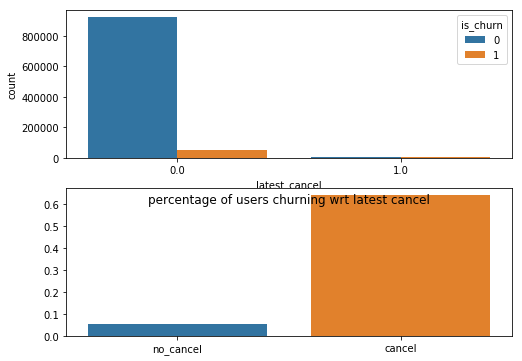

In [116]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.countplot(x='latest_cancel',data=data_train,hue='is_churn',ax=ax1)
sns.barplot(['no_cancel','cancel'],np.array(data_train.groupby(by='latest_cancel')['is_churn'].mean()),ax=ax2)
ax2.set_title('percentage of users churning wrt latest cancel',pad=-15)

In [117]:
del latest, latest_cancel_train, latest_cancel_test
gc.collect()

21

In [118]:
# 12. rate_cancel
latest = train_transactions[train_transactions['date_relative']>=0].groupby(by='msno')['is_cancel'].apply(lambda x: x.mean())
latest_renew_train = pd.DataFrame({'msno':latest.index, 'rate_cancel':latest.values})

latest = test_transactions[test_transactions['date_relative']>=0].groupby(by='msno')['is_cancel'].apply(lambda x: x.mean())
latest_renew_test = pd.DataFrame({'msno':latest.index, 'rate_cancel':latest.values})

data_train = pd.merge(data_train,latest_renew_train,on='msno',how='left')
data_test = pd.merge(data_test,latest_renew_test,on='msno',how='left')



In [119]:
# sum_of_discrepancy_paid
number = train_transactions[train_transactions['date_relative']>=0].groupby(by='msno')['discrepancy_paid'].sum()
number_train = pd.DataFrame({'msno':number.index, 'sum_discrepancy_paid':number.values})

number = test_transactions[test_transactions['date_relative']>=0].groupby(by='msno')['discrepancy_paid'].sum()
number_test = pd.DataFrame({'msno':number.index, 'sum_discrepancy_paid':number.values})



In [120]:
data_train = pd.merge(data_train,number_train,on='msno',how='left')
data_train.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_date,year,month,...,total_transactions_3m,latest_transactions,common_payment_method,number_payment_method,common_plan_days,latest_auto_renew,rate_auto_renew,latest_cancel,rate_cancel,sum_discrepancy_paid
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18,36,female,9,20050406,2005-04-06,2005,4,...,1.0,24.0,38.0,1.0,7.0,0.0,0.000000,0.0,0.000000,0.0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10,38,male,9,20050407,2005-04-07,2005,4,...,3.0,0.0,39.0,2.0,30.0,1.0,0.954545,0.0,0.045455,-149.0
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11,27,female,9,20051016,2005-10-16,2005,10,...,3.0,19.0,39.0,2.0,30.0,1.0,0.800000,1.0,0.100000,0.0
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13,23,female,9,20051102,2005-11-02,2005,11,...,0.0,390.0,17.0,2.0,410.0,0.0,0.000000,0.0,0.000000,0.0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3,27,male,9,20051228,2005-12-28,2005,12,...,3.0,3.0,38.0,1.0,30.0,0.0,0.000000,0.0,0.000000,0.0


In [121]:
data_test = pd.merge(data_test,number_test,on='msno',how='left')
data_test.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_date,year,month,...,total_transactions_3m,latest_transactions,common_payment_method,number_payment_method,common_plan_days,latest_auto_renew,rate_auto_renew,latest_cancel,rate_cancel,sum_discrepancy_paid
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0,1,0,unknown,7,20150718,2015-07-18,2015,7,...,3.0,13,41,1,30,1,1.0,0,0.000000,0
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,4,28,male,9,20051030,2005-10-30,2005,10,...,3.0,0,34,1,30,1,1.0,0,0.000000,-894
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0,4,34,male,7,20141101,2014-11-01,2014,11,...,3.0,16,41,1,30,1,1.0,0,0.181818,239
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0,1,0,unknown,7,20151009,2015-10-09,2015,10,...,3.0,4,41,1,30,1,1.0,0,0.000000,0
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0,1,0,unknown,13,20161222,2016-12-22,2016,12,...,3.0,9,30,1,30,1,1.0,0,0.000000,0


In [122]:
del number, number_train, number_test
gc.collect()

56

In [124]:
data_train[['is_churn','sum_discrepancy_paid']].corr()

,is_churn,sum_discrepancy_paid
is_churn,1.000000,0.053982
sum_discrepancy_paid,0.053982,1.000000


In [125]:
data_train.shape

(992931, 23)

In [126]:
data_train.isnull().sum()

msno                         0
is_churn                     0
city                         0
bd                           0
gender                       0
registered_via               0
registration_init_time       0
registration_init_date       0
year                         0
month                        0
total_transactions           0
total_transactions_12m       0
total_transactions_6m        0
total_transactions_3m        0
latest_transactions       1462
common_payment_method     1462
number_payment_method     1462
common_plan_days          1462
latest_auto_renew         1462
rate_auto_renew           1462
latest_cancel             1462
rate_cancel               1462
sum_discrepancy_paid      1462
dtype: int64

In [127]:
data_test.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_date,year,month,...,total_transactions_3m,latest_transactions,common_payment_method,number_payment_method,common_plan_days,latest_auto_renew,rate_auto_renew,latest_cancel,rate_cancel,sum_discrepancy_paid
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0,1,0,unknown,7,20150718,2015-07-18,2015,7,...,3.0,13,41,1,30,1,1.0,0,0.000000,0
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,4,28,male,9,20051030,2005-10-30,2005,10,...,3.0,0,34,1,30,1,1.0,0,0.000000,-894
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0,4,34,male,7,20141101,2014-11-01,2014,11,...,3.0,16,41,1,30,1,1.0,0,0.181818,239
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0,1,0,unknown,7,20151009,2015-10-09,2015,10,...,3.0,4,41,1,30,1,1.0,0,0.000000,0
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0,1,0,unknown,13,20161222,2016-12-22,2016,12,...,3.0,9,30,1,30,1,1.0,0,0.000000,0


In [128]:
data_test.isnull().sum()

msno                      0
is_churn                  0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
registration_init_date    0
year                      0
month                     0
total_transactions        0
total_transactions_12m    0
total_transactions_6m     0
total_transactions_3m     0
latest_transactions       0
common_payment_method     0
number_payment_method     0
common_plan_days          0
latest_auto_renew         0
rate_auto_renew           0
latest_cancel             0
rate_cancel               0
sum_discrepancy_paid      0
dtype: int64

In [129]:
del train_transactions, test_transactions
gc.collect()

28

In [130]:
del train, test
gc.collect()

14

In [131]:
data_train.fillna(0, inplace = True)

In [132]:
data_train.isnull().sum()

msno                      0
is_churn                  0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
registration_init_date    0
year                      0
month                     0
total_transactions        0
total_transactions_12m    0
total_transactions_6m     0
total_transactions_3m     0
latest_transactions       0
common_payment_method     0
number_payment_method     0
common_plan_days          0
latest_auto_renew         0
rate_auto_renew           0
latest_cancel             0
rate_cancel               0
sum_discrepancy_paid      0
dtype: int64

In [133]:
change_datatype_numeric(data_train)
change_datatype_numeric(data_test)

In [134]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992931 entries, 0 to 992930
Data columns (total 23 columns):
msno                      992931 non-null object
is_churn                  992931 non-null int8
city                      992931 non-null int8
bd                        992931 non-null int16
gender                    992931 non-null object
registered_via            992931 non-null int8
registration_init_time    992931 non-null uint32
registration_init_date    992931 non-null datetime64[ns]
year                      992931 non-null uint16
month                     992931 non-null uint8
total_transactions        992931 non-null uint8
total_transactions_12m    992931 non-null float32
total_transactions_6m     992931 non-null float32
total_transactions_3m     992931 non-null float32
latest_transactions       992931 non-null float32
common_payment_method     992931 non-null float32
number_payment_method     992931 non-null float32
common_plan_days          992931 non-null float32
l

In [135]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907471 entries, 0 to 907470
Data columns (total 23 columns):
msno                      907471 non-null object
is_churn                  907471 non-null int8
city                      907471 non-null int8
bd                        907471 non-null int16
gender                    907471 non-null object
registered_via            907471 non-null int8
registration_init_time    907471 non-null uint32
registration_init_date    907471 non-null datetime64[ns]
year                      907471 non-null uint16
month                     907471 non-null uint8
total_transactions        907471 non-null uint8
total_transactions_12m    907471 non-null float32
total_transactions_6m     907471 non-null float32
total_transactions_3m     907471 non-null float32
latest_transactions       907471 non-null uint16
common_payment_method     907471 non-null uint8
number_payment_method     907471 non-null uint8
common_plan_days          907471 non-null uint16
latest_

In [136]:
data_test.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_date,year,month,...,total_transactions_3m,latest_transactions,common_payment_method,number_payment_method,common_plan_days,latest_auto_renew,rate_auto_renew,latest_cancel,rate_cancel,sum_discrepancy_paid
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0,1,0,unknown,7,20150718,2015-07-18,2015,7,...,3.0,13,41,1,30,1,1.0,0,0.000000,0
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,4,28,male,9,20051030,2005-10-30,2005,10,...,3.0,0,34,1,30,1,1.0,0,0.000000,-894
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0,4,34,male,7,20141101,2014-11-01,2014,11,...,3.0,16,41,1,30,1,1.0,0,0.181818,239
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0,1,0,unknown,7,20151009,2015-10-09,2015,10,...,3.0,4,41,1,30,1,1.0,0,0.000000,0
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0,1,0,unknown,13,20161222,2016-12-22,2016,12,...,3.0,9,30,1,30,1,1.0,0,0.000000,0


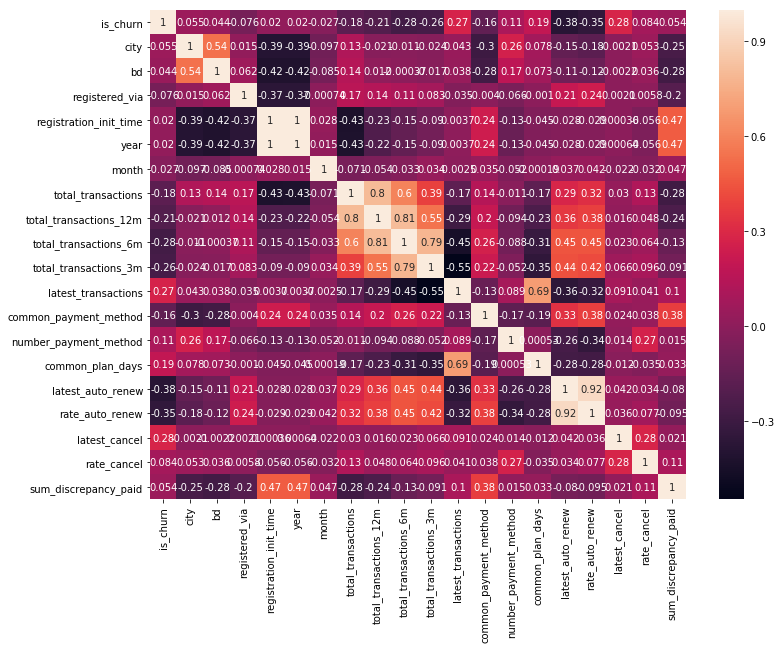

In [137]:
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(111)
sns.heatmap(data_train.corr(), annot=True,ax=ax1)

In [148]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992931 entries, 0 to 992930
Data columns (total 23 columns):
msno                      992931 non-null object
is_churn                  992931 non-null int8
city                      992931 non-null int8
bd                        992931 non-null int16
gender                    992931 non-null object
registered_via            992931 non-null int8
registration_init_time    992931 non-null uint32
registration_init_date    992931 non-null datetime64[ns]
year                      992931 non-null uint16
month                     992931 non-null uint8
total_transactions        992931 non-null uint8
total_transactions_12m    992931 non-null float32
total_transactions_6m     992931 non-null float32
total_transactions_3m     992931 non-null float32
latest_transactions       992931 non-null uint16
common_payment_method     992931 non-null uint8
number_payment_method     992931 non-null uint8
common_plan_days          992931 non-null uint16
latest_

In [139]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907471 entries, 0 to 907470
Data columns (total 23 columns):
msno                      907471 non-null object
is_churn                  907471 non-null int8
city                      907471 non-null int8
bd                        907471 non-null int16
gender                    907471 non-null object
registered_via            907471 non-null int8
registration_init_time    907471 non-null uint32
registration_init_date    907471 non-null datetime64[ns]
year                      907471 non-null uint16
month                     907471 non-null uint8
total_transactions        907471 non-null uint8
total_transactions_12m    907471 non-null float32
total_transactions_6m     907471 non-null float32
total_transactions_3m     907471 non-null float32
latest_transactions       907471 non-null uint16
common_payment_method     907471 non-null uint8
number_payment_method     907471 non-null uint8
common_plan_days          907471 non-null uint16
latest_

In [140]:
data_train.describe()

,is_churn,city,bd,registered_via,registration_init_time,year,month,total_transactions,total_transactions_12m,total_transactions_6m,total_transactions_3m,latest_transactions,common_payment_method,number_payment_method,common_plan_days,latest_auto_renew,rate_auto_renew,latest_cancel,rate_cancel,sum_discrepancy_paid
count,992931.000000,992931.000000,992931.000000,992931.000000,9.929310e+05,992931.000000,992931.000000,992931.000000,992931.000000,992931.000000,992931.000000,992931.000000,992931.000000,992931.000000,992931.000000,992931.000000,992931.000000,992931.000000,992931.000000,992931.000000
mean,0.063923,5.313078,11.885317,6.921579,2.013446e+07,2013.374302,7.042706,17.138657,9.508527,5.336593,2.742604,18.209106,38.688778,1.165818,33.068264,0.886155,0.873609,0.013717,0.013839,-73.561356
std,0.244616,6.237399,19.495340,1.790204,2.858687e+04,2.857988,3.559668,8.450392,3.801936,1.605622,0.742938,41.415253,3.858701,0.471481,30.682898,0.318832,0.312363,0.115534,0.035772,220.619690
min,0.000000,1.000000,-3152.000000,3.000000,2.004033e+07,2004.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2086.000000
25%,0.000000,1.000000,0.000000,7.000000,2.012063e+07,2012.000000,4.000000,10.000000,7.000000,5.000000,3.000000,4.000000,38.000000,1.000000,30.000000,1.000000,1.000000,0.000000,0.000000,-149.000000
50%,0.000000,1.000000,0.000000,7.000000,2.015012e+07,2015.000000,8.000000,18.000000,12.000000,6.000000,3.000000,13.000000,41.000000,1.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,10.000000,26.000000,7.000000,2.015112e+07,2015.000000,10.000000,24.000000,12.000000,6.000000,3.000000,22.000000,41.000000,1.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,22.000000,2016.000000,13.000000,2.017033e+07,2017.000000,12.000000,244.000000,244.000000,180.000000,64.000000,759.000000,41.000000,8.000000,450.000000,1.000000,1.000000,1.000000,1.000000,1599.000000


In [141]:
data_train['latest_cancel']=data_train['latest_cancel'].astype(dtype = 'uint8')

In [142]:
data_train['sum_discrepancy_paid']=data_train['sum_discrepancy_paid'].astype(dtype = 'int16')

In [143]:
data_train['latest_auto_renew']=data_train['latest_auto_renew'].astype(dtype = 'uint8')

In [144]:
data_train['common_plan_days']=data_train['common_plan_days'].astype(dtype = 'uint16')

In [145]:
data_train['number_payment_method']=data_train['number_payment_method'].astype(dtype = 'uint8')

In [146]:
data_train['common_payment_method']=data_train['common_payment_method'].astype(dtype = 'uint8')

In [147]:
data_train['latest_transactions']=data_train['latest_transactions'].astype(dtype = 'uint16')

In [149]:
data_test.to_csv('features\\test_trans_mems.csv',index=False)
data_train.to_csv('features\\train_trans_mems.csv',index=False)